In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Loading Dataset

In [24]:
dataset=pd.read_csv("Housing-3.csv")

In [25]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#Data preprocessing

In [26]:
missing_values=dataset.isnull().sum()
print("missing values :")
print(missing_values)
print(len(dataset))

missing values :
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
545


In [27]:
#Removing empty cells rows
dataset.dropna(inplace=True)

In [28]:
#label encoding for predict and hot code encoding for x converting non numerical values to numerical values
dataset=pd.get_dummies(dataset,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],drop_first=True)


In [29]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [32]:
x=dataset.drop("price",axis=1)
y=dataset["price"]
print(len(x))
print(len(y))

545
545


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=model.predict(x_test)

In [36]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"mean_absolute_error :{mae:.2f}")
print(f"mean_squared_error :{mse:.2f}")
print(f"r2_score :{r2:.2f}")

mean_absolute_error :970043.40
mean_squared_error :1754318687330.66
r2_score :0.65


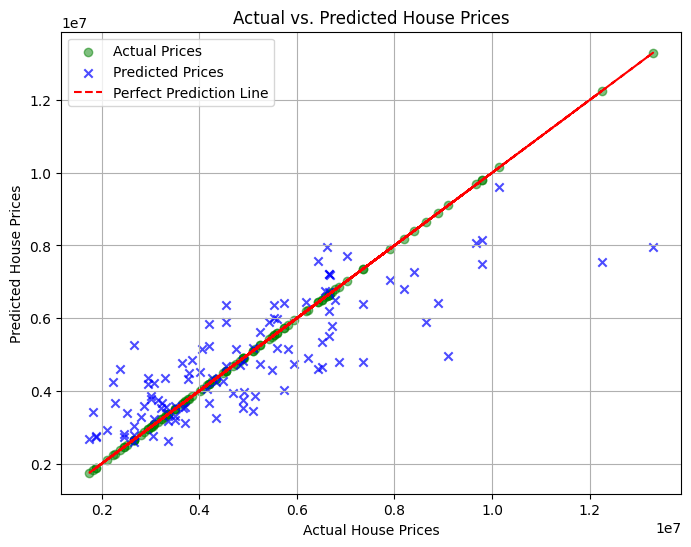

In [37]:
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
# Scatterplot of actual house prices
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Prices', marker='o')
# Scatterplot of predicted house prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted Prices', marker='x')
# Plot a 45-degree line to represent perfect predictions where predicted equals actual
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')
# Label the x-axis as 'Actual House Prices'
plt.xlabel('Actual House Prices')
# Label the y-axis as 'Predicted House Prices'
plt.ylabel('Predicted House Prices')
# Add a title to the plot
plt.title('Actual vs. Predicted House Prices')
# Add a grid to the plot for better readability
plt.grid(True)
# Add a legend to differentiate between actual and predicted prices
plt.legend()
# Display the plot
plt.show()